# Selected methods in mathematical statistics - fundaments

In [1]:
import sys, os; sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%precision 4
%matplotlib inline
# %matplotlib notebook

## Mean value (průměr)
- Mean is sum of the sampled values divided by the number of items in the sample 
- $\mu$ refers to a population mean and $\bar{x}$, to a sample mean.

(Arithmetic mean) $$\mu = \frac{1}{n}\sum_{i=0}^{n} x_i$$

(Geometric mean) $$\mu = (\prod_{i=0}^{n} x_i)^{\frac{1}{n}}$$



In [2]:
# arithmetic mean example
data = [1, 3, 5, 7, 9]
# --------------------------
mean = sum(data)/len(data)
mean

5.0000

In [3]:
# geometric mean example
data = [1, 3, 5, 7, 9]
# --------------------------
from numpy import prod
mean = prod(data) ** (1/len(data))
mean

3.9363

## Variance (rozptyl) and Standard deviation (směrodatná odchylka)

- Variance is the average of the squared differences from the [Mean](#Statistics-fundations)
- $\sigma^2$ refers to a population mean and $s^2$, to a sample mean.
- measures how far a set of numbers is "spread out"

Variance (equally likely values) $$\sigma^2 = \frac{1}{n}\sum_{i=0}^{n} (x^i - \mu)^2$$


- Standard deviation (STD) $s$ (or $\sigma$ for whole set)
- $\sigma$ refers to the standard deviation of a population and $s$, to the standard deviation of a sample.
- measures how far a set of numbers is "spread out" without power of 2 thus making result more sensible
- in average whats is the spread of set from the mean


STD $$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{n}\sum_{i=0}^{n} (x^i - \mu)^2}$$

In [4]:
# variance example
data = [1, 2, 4, 8]
# --------------------------
n = len(data)
mu = sum(data)/len(data)
sum([(x_i - mu) ** 2. for x_i in data]) * (1.0/n)

7.1875

In [5]:
# standard deviation example
data = [1, 2, 4, 8]
# --------------------------
from numpy import var, sqrt
sigma = var(data)
sqrt(sigma)

2.6810

## Quantiles (kvantily), quartile (kvartily), percentiles (percentily), median (medián)

### Quantiles
 - quantile are dividing the range of a probability distribution into contiguous intervals with equal probabilities


### Quartiles
 - first quartile $Q_1$ splits off the lowest 25% of data from the highest 75% (also called **lower quartile**)
 - second quartile $Q_2$ cuts data set in half (also called **median**)
 - trird quartile $Q_3$ splits off the highest 25% of data from the lowest 75% (also called **higher quartile**)
 
### Percentiles
  - percentiles with percentage resolution, indicating the *value* below which a given percentage of observations in a group of observations fall

In [6]:
# Quantiles, quartiles and percentiles examples
data = [1, 0, 0, 2, 2, 2, 3, 4, 4, 5, 5]
percent = 0.25
# ---------------------------------------------

# function to compute quantile given data and p value
def quantile(data, percent=0.25):
    n = len(data)
    sx = np.sort(data)
    if n * percent == int(n * percent):
        return (sx[int((n - 1) * percent)] + sx[int((n) * percent)]) / 2
    return sx[int(n * percent)]

print('Q1: %1.4f' % quantile(data, 0.25))
print('Q2: %1.4f' % quantile(data, 0.50))
print('Q3: %1.4f' % quantile(data, 0.75))

Q1: 1.0000
Q2: 2.0000
Q3: 4.0000


## Mode (modus)

 - mode $Mod(X)$ is the most repeating element in set or data

In [7]:
# mode example
data = [1, 0, 0, 2, 2, 2, 3, 4, 4, 5, 5]
# --------------------------
def mode(data):
    counts = np.bincount(data)
    return np.argmax(counts)

mode(data)

2

## Comparison of mean, median and mode


max      9.00
mean     4.00
mode     2.00
min      1.00
median   3.00


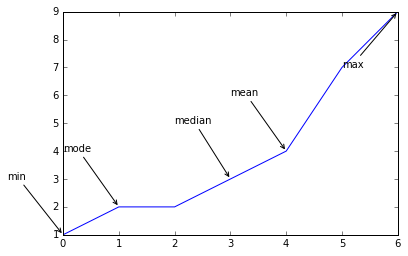

In [8]:
# Comparison of mean, median and mode
data = [1, 2, 2, 3, 4, 7, 9]
# --------------------------
experiments = {
    'mean': np.mean,
    'median': np.median,
    'mode': mode,
    'min': min,
    'max': max
}
# --------------------------
# plot
plt.plot(range(len(data)), data)

# run experiments
i = 0
for name, method in experiments.items():
    result = int(method(data))
    i += 1
    print('{:8s} {:1.2f}'.format(name, result))
    if result in data:
        position = data.index(result)
        ytext = result + 2 if result < max(data) else result - 2
        xtext = position - 1

        plt.annotate(name,
                xy=(position, result), xycoords='data',
                xytext=(xtext, ytext), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                )

## Histogram

 - frequency of a variable in given interval (useful for larger data set or non-integer values in data set)

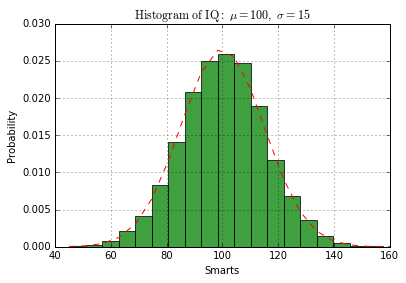

In [9]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()